<a href="https://colab.research.google.com/github/IssacVinson/HousePricePredictor/blob/main/Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

train_df = pd.read_csv("df_train.csv")
test_df = pd.read_csv("df_test.csv")

print(train_df.shape)
print(train_df.head())
print(train_df.info())


(13603, 14)
         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-05-15  312000.0         2      2          True     138.42547   
1  2014-11-14  310000.0         2      2         False     105.90942   
2  2014-12-24  320000.0         2      2         False     117.98681   
3  2015-02-22  264500.0         2      3         False     151.43189   
4  2015-01-06  700000.0         3      2          True     341.88304   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False              False               2          True   
1      False      False              False               1          True   
2      False       True              False               1         False   
3      False      False              False               2          True   
4      False      False              False               3         False   

   single_floor  month  quartile_zone  
0         False      5              1  
1         False   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
 14  living_in_sqft     13603 non-null  float64
dtypes: bool(6), float64(3), int64(5), object(1)
memory usage: 1.0+ MB
None

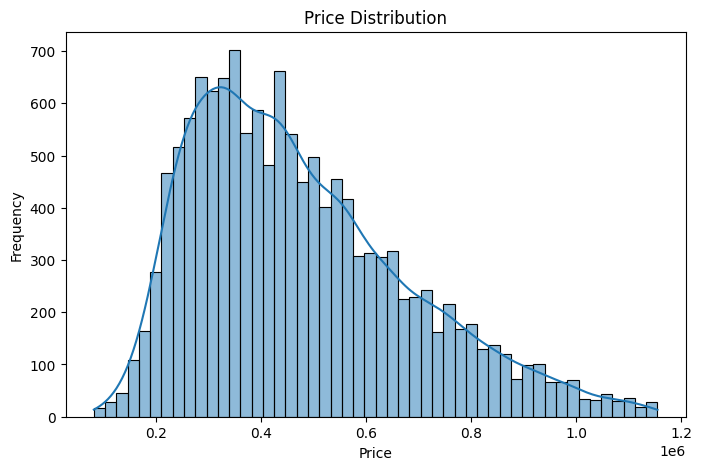

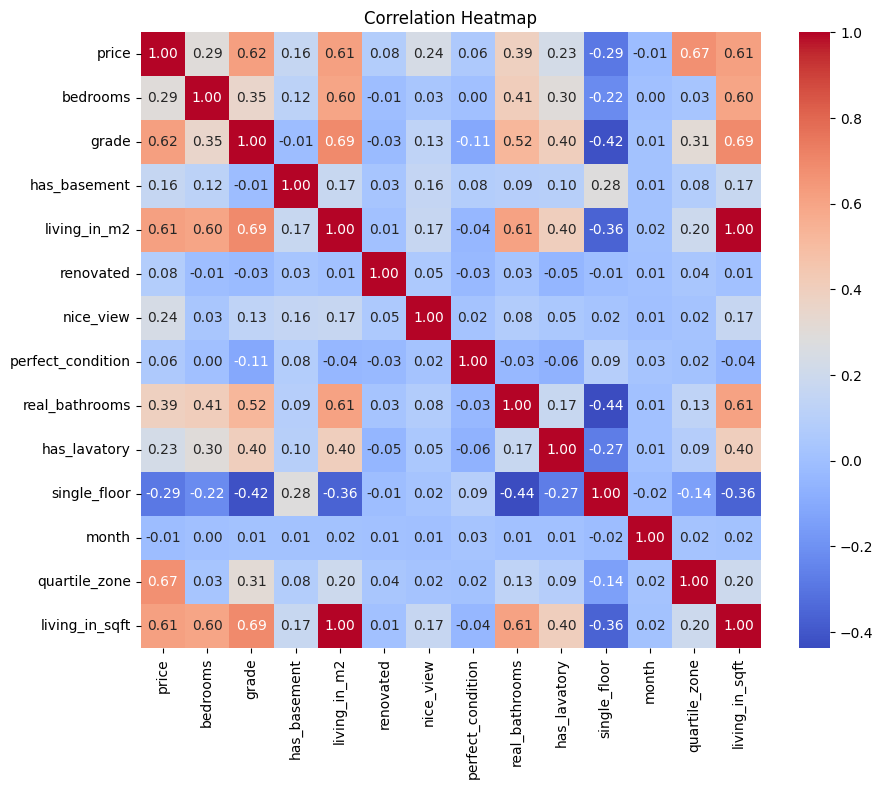

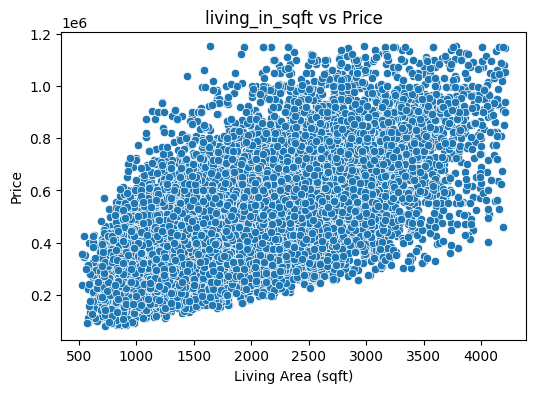

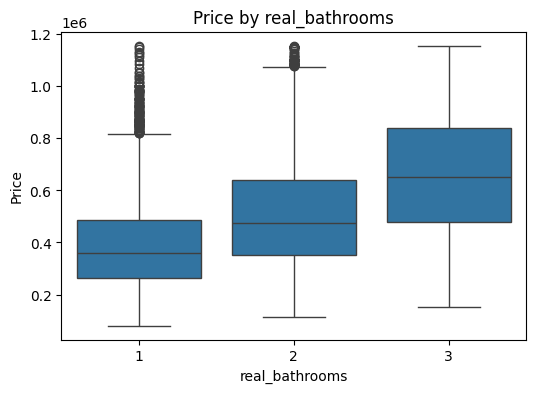

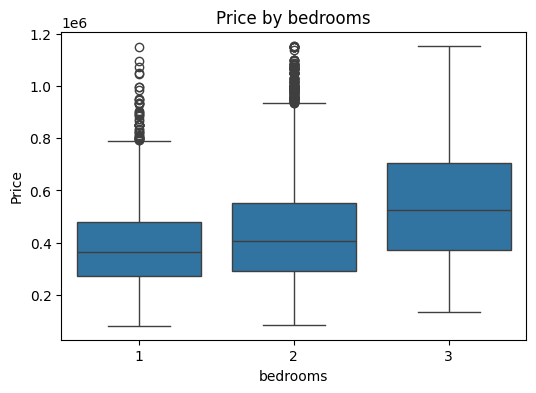

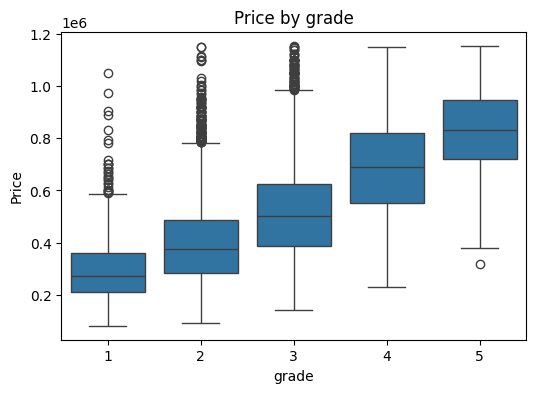

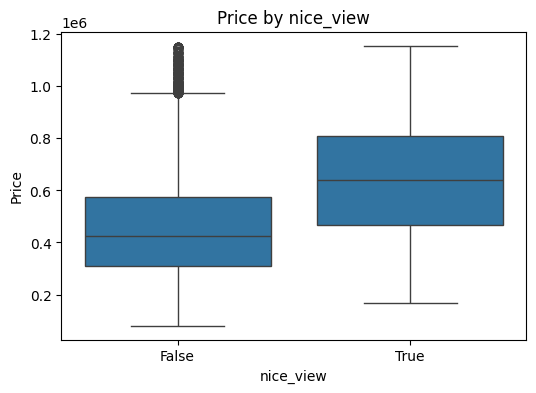

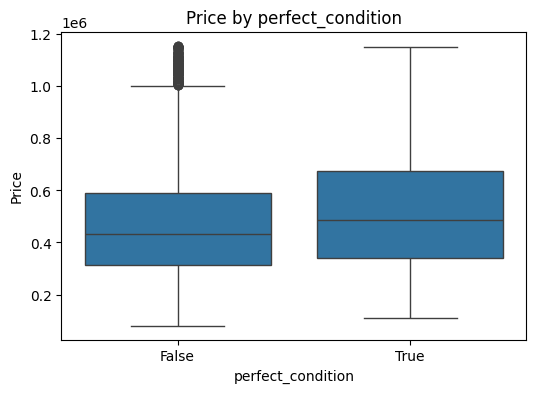

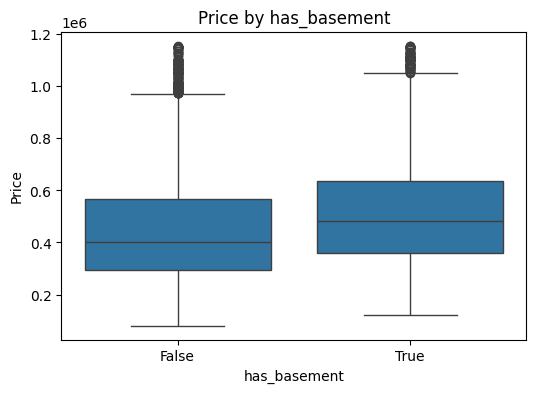

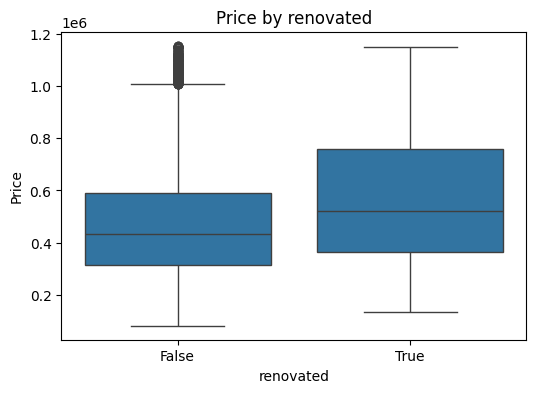

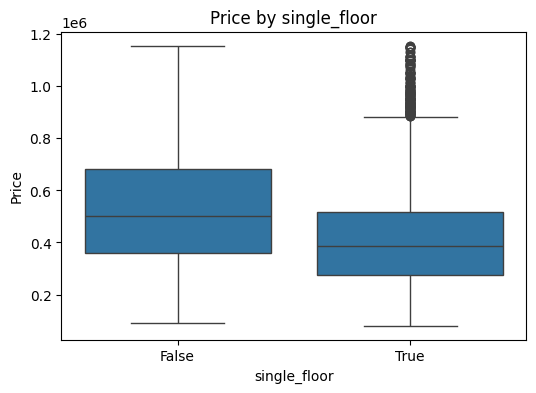

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df['living_in_sqft'] = train_df['living_in_m2'] * 10.7639
test_df['living_in_sqft'] = test_df['living_in_m2'] * 10.7639

print(train_df.info())
print(train_df.describe())

correlation = train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)
print(correlation)

plt.figure(figsize=(8, 5))
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (In Millions)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=train_df['living_in_sqft'], y=train_df['price'])
plt.title('living_in_sqft vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price (In Millions)')
plt.show()

box_features = ['real_bathrooms', 'bedrooms', 'grade']
for col in box_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], y=train_df['price'])
    plt.title(f'Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Price (In Millions)')
    plt.show()

flags = ['nice_view', 'perfect_condition', 'has_basement', 'renovated', 'single_floor']
for col in flags:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], y=train_df['price'])
    plt.title(f'Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Price (In Millions)')
    plt.show()



In [20]:
# Use this during training
train_df['living_in_sqft'] = train_df['living_in_m2'] * 10.7639
X_train = train_df.drop(columns=['price', 'date', 'living_in_m2'])  # Drop m2 instead
y_train = train_df['price']

# Same for test set
test_df['living_in_sqft'] = test_df['living_in_m2'] * 10.7639
X_test = test_df.drop(columns=['price', 'date', 'living_in_m2'])
y_test = test_df['price']



In [21]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 108159.71
R²: 0.73


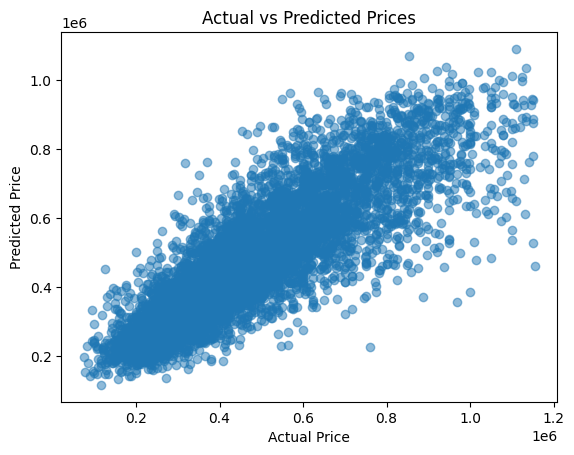

In [22]:
plt.scatter(y_test, preds, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (In Millions)")
plt.show()

In [25]:
import numpy as np
import pandas as pd

print("Enter your home's details (use Y/N for booleans first, then number inputs):")

limits = {
    'bedrooms': (1, 3),
    'grade': (1, 5),
    'real_bathrooms': (1, 3),
    'living_in_sqft': (530, 4210),
    'month': (1, 12),
    'quartile_zone': (1, 4)
}

def get_numeric_input(prompt, min_val, max_val):
    val = int(input(f"{prompt} [{min_val}–{max_val}]: "))
    return max(min(val, max_val), min_val)

def get_bool_input(prompt):
    return input(f"{prompt} (Y/N): ").strip().upper() == 'Y'

user_input = {
    'has_basement': get_bool_input("Has basement"),
    'renovated': get_bool_input("Renovated"),
    'nice_view': get_bool_input("Nice view"),
    'perfect_condition': get_bool_input("Perfect condition"),
    'has_lavatory': get_bool_input("Has half bath"),
    'single_floor': get_bool_input("Single floor")
}

user_input.update({
    'living_in_sqft': get_numeric_input("Living area (sqft)", *limits['living_in_sqft']),
    'bedrooms': get_numeric_input("Bedrooms", *limits['bedrooms']),
    'real_bathrooms': get_numeric_input("Full bathrooms", *limits['real_bathrooms']),
    'grade': get_numeric_input("Grade", *limits['grade']),
    'month': get_numeric_input("Month of sale", *limits['month']),
    'quartile_zone': get_numeric_input("Quartile zone", *limits['quartile_zone'])
})

input_df = pd.DataFrame([user_input])

input_df = input_df[X_train.columns]

predicted_price = model.predict(input_df)[0]
print(f"\nEstimated House Price: ${predicted_price:,.2f}")


📋 Enter your home's details (use Y/N for booleans first, then number inputs):
Has basement (Y/N): y
Renovated (Y/N): y
Nice view (Y/N): y
Perfect condition (Y/N): y
Has half bath (Y/N): y
Single floor (Y/N): n
Bedrooms [1–3]: 3
Grade [1–5]: 5
Living area (sqft) [530–4210]: 3000
Full bathrooms [1–3]: 3
Month of sale [1–12]: 6
Quartile zone [1–4]: 3

🏠 Estimated House Price: $927,224.50
